# 1.The site's 'Extracting data from PDfs' ，'World Bank API', 'the Bureau of Statistics', and others have all made

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import textwrap


pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv", nrows=10
)

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
5,6,Amy,1975,6,28,6,32.4,-78.7,tropical depression,NaN,25,1012,NaN,NaN
6,7,Amy,1975,6,28,12,33.3,-78.0,tropical depression,NaN,25,1011,NaN,NaN
7,8,Amy,1975,6,28,18,34.0,-77.0,tropical depression,NaN,30,1006,NaN,NaN
8,9,Amy,1975,6,29,0,34.4,-75.8,tropical storm,NaN,35,1004,NaN,NaN
9,10,Amy,1975,6,29,6,34.0,-74.8,tropical storm,NaN,40,1002,NaN,NaN


In [92]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
 
url = "https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data"#This API is being decommissioned
 
# Get the data from the ONS API:
response = requests.get(url)
response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
json_data = response.json()
 
# Check if the structure is as expected
if 'description' in json_data and 'title' in json_data['description']:
    title = json_data['description']['title']
else:
    title = "Unknown Title"  # Fallback if title is not found
 
# Prep the data for a quick plot
try:
    months_data = json_data.get('months', [])
    df = (
        pd.DataFrame(pd.json_normalize(months_data))
        .assign(
            date=lambda x: pd.to_datetime(x['date']),
            value=lambda x: pd.to_numeric(x['value'], errors='coerce')  # Coerce errors to NaN
        )
        .set_index("date")
    )
    df = df.dropna()  # Drop rows with NaN values
 
    # Plot the data
    df['value'].plot(title=title, ylim=(0, df['value'].max() * 1.2), lw=3.0)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

HTTPError: 404 Client Error: Not Found for url: https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data

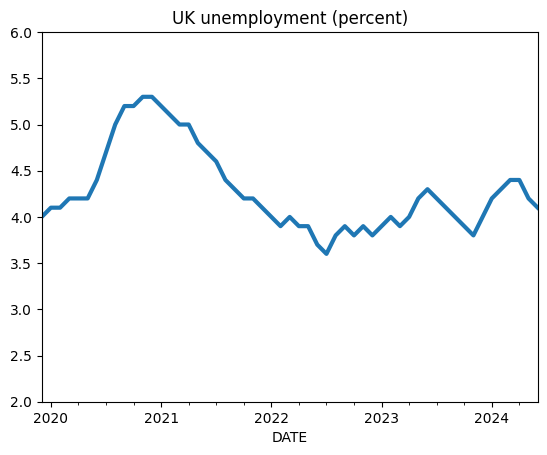

In [12]:
import pandas_datareader.data as web

df_u = web.DataReader("LRHUTTTTGBM156S", "fred")

df_u.plot(title="UK unemployment (percent)", legend=False, ylim=(2, 6), lw=3.0);

In [15]:
# World Bank CO2 emissions (metric tons per capita)
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
# World Bank pop
# https://data.worldbank.org/indicator/SP.POP.TOTL
# country and region codes at http://api.worldbank.org/v2/country
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')
import textwrap
from pandas_datareader import wb
df = wb.download(
    indicator="EN.GHG.CO2.PC.CE.AR5",
    country=["US", "CHN", "IND", "Z4", "Z7"],
    start=2017,
    end=2017,
)
# remove country as index for ease of plotting with seaborn
df = df.reset_index()
# wrap long country names
df["country"] = df["country"].apply(lambda x: textwrap.fill(x, 10))
# order based on size
df = df.sort_values("EN.GHG.CO2.PC.CE.AR5")
df.head()

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: Z4, Z7
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8528\2700678859.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(


,country,year,EN.GHG.CO2.PC.CE.AR5
3,India,2017,1.797468
1,East Asia\n& Pacific,2017,6.528271
2,Europe &\nCentral\nAsia,2017,7.208893
0,China,2017,7.897143
4,United\nStates,2017,15.254673


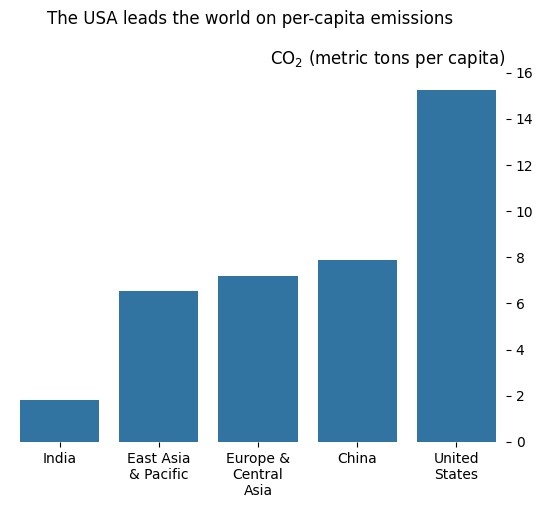

In [18]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x="country", y="EN.GHG.CO2.PC.CE.AR5", data=df.reset_index(), ax=ax)
ax.set_title(r"CO$_2$ (metric tons per capita)", loc="right")
plt.suptitle("The USA leads the world on per-capita emissions", y=1.01)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
ax.yaxis.tick_right()
plt.show()

In [97]:
import pandasdmx as pdmx
# Tell pdmx we want OECD data
oecd = pdmx.Request("OECD")
# Set out everything about the request in the format specified by the OECD API
data = oecd.data(
    resource_id="PDB_LV",#Can't find this resource id
    key="GBR+FRA+CAN+ITA+DEU+JPN+USA.T_GDPEMP.CPC/all?startTime=2010",
).to_pandas()

df = pd.DataFrame(data).reset_index()
df.head()

TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [33]:
url = "http://aeturrell.com/research"
page = requests.get(url)
page.text[:300]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>\n\n<meta charset="utf-8">\n<meta name="generator" content="quarto-1.5.56">\n\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n\n<meta name="author" content="Arthur Turrell">\n'

In [34]:
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[60000:60500])

       </div>
          <div class="project-category">
           <a href="#category=gender pay gap">
            gender pay gap
           </a>
          </div>
          <div class="project-category">
           <a href="#category=labour">
            labour
           </a>
          </div>
          <div class="project-category">
           <a href="#category=text analysis">
            text analysis
           </a>
          </div>
         </div>
         <div class="project-details-listing


In [35]:
# Get all paragraphs
all_paras = soup.find_all("p")
# Just show one of the paras
all_paras[1]


<p>Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." <i>Environment and Planning B: Urban Analytics and City Science</i> (2024): 23998083241267331. doi: <a href="https://doi.org/10.1177/23998083241267331"><code>10.1177/23998083241267331</code></a></p>

In [36]:
all_paras[1].text

'Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." Environment and Planning B: Urban Analytics and City Science (2024): 23998083241267331. doi: 10.1177/23998083241267331'

In [52]:
projects = soup.find_all("div", class_="project-content listing-pub-info")
projects = [x.text.strip() for x in projects]
projects[:4]

['Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." Environment and Planning B: Urban Analytics and City Science (2024): 23998083241267331. doi: 10.1177/23998083241267331',
 'Kalamara, Eleni, Arthur Turrell, Chris Redl, George Kapetanios, and Sujit Kapadia. "Making text count: economic forecasting using newspaper text." Journal of Applied Econometrics 37, no. 5 (2022): 896-919. doi: 10.1002/jae.2907',
 'Turrell, A., Speigner, B., Copple, D., Djumalieva, J. and Thurgood, J., 2021. Is the UK’s productivity puzzle mostly driven by occupational mismatch? An analysis using big data on job vacancies. Labour Economics, 71, p.102013. doi: 10.1016/j.labeco.2021.102013',
 'Haldane, Andrew G., and Arthur E. Turrell. "Drawing on different disciplines: macroeconomic agent-based models." Journal of Evolutionary Economics 29 (2019): 39-66. doi: 10.1007/s00191-018-0557-5']

In [74]:
df_list = pd.read_html(
    "https://simple.wikipedia.org/wiki/FIFA_World_Cup", match="Sweden"
)
# Retrieve first and only entry from list of dataframes
df = df_list[0]
df.head()

,Years,Hosts,Winners,Score,Runner's-up,Third place,Score.1,Fourth place
0,1930 Details,Uruguay,Uruguay,4 - 2,Argentina,United States,[note 1],Yugoslavia
1,1934 Details,Italy,Italy,2 - 1,Czechoslovakia,Germany,3 - 2,Austria
2,1938 Details,France,Italy,4 - 2,Hungary,Brazil,4 - 2,Sweden
3,1950 Details,Brazil,Uruguay,2 - 1,Brazil,Sweden,[note 2],Spain
4,1954 Details,Switzerland,West Germany,3 - 2,Hungary,Austria,3 - 1,Uruguay


In [2]:
import fitz #Couldn't be read with the pdftotext function because of the version, so it's replaced with the PyMuPDF
from pathlib import Path
 

pdf_path = Path("data/pdf_with_table.pdf")  

try:
    pdf_document = fitz.open(pdf_path)  
    all_text = "" 
 
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num) 
        page_text = page.get_text()  
        all_text += page_text + "\n\n"  
    
    print(all_text[:220])  
 
finally:

    pdf_document.close() 
 

3 
 
2 Quantifying Fuel-Saving Opportunities from Specific Driving 
Behavior Changes 
2.1 
Savings from Improving Individual Driving Profiles 
2.1.1 Drive Profile Subsample from Real-World Travel Survey 
The interim repo


In [1]:
import pdfplumber #Changed functions due to system version
 
with pdfplumber.open('data/pdf_with_table.pdf') as pdf:

    for page in pdf.pages:   
        tables = page.extract_tables()
        table = tables[0]
        for row in table:
            print(row)

['Cycle\nName', 'KI\n(1/km)', 'Distance\n(mi)', 'Percent Fuel Savings', None, None, None]
[None, None, None, 'Improved\nSpeed', 'Decreased\nAccel', 'Eliminate\nStops', 'Decreased\nIdle']
['2012_2', '3.30', '1.3', '5.9%', '9.5%', '29.2%', '17.4%']
['2145_1', '0.68', '11.2', '2.4%', '0.1%', '9.5%', '2.7%']
['4234_1', '0.59', '58.7', '8.5%', '1.3%', '8.5%', '3.3%']
['2032_2', '0.17', '57.8', '21.7%', '0.3%', '2.7%', '1.2%']
['4171_1', '0.07', '173.9', '58.1%', '1.6%', '2.1%', '0.5%']


In [ ]:
#import textract
#text = textract.process(Path('path/to/file.extension'))
#Currently, this third-party library does not run on Windows.

# 2.Go through https://www.geeksforgeeks.org/scrape-imdb-movie-rating-and-detalls-using-python/. Recreate the code on your machine.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/116.0',
    'Accept': '*/*',
    'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'text/plain;charset=UTF-8',
}

url = 'https://www.imdb.com/chart/top'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('li.ipc-metadata-list-summary-item')

In [ ]:
index = 0

title_string = movies[index].select('h3')[0].text.split(". ")
place = title_string[0]
movie_title = title_string[1]
rating = movies[index].select('span.ipc-rating-star--rating')[0].text
year = movies[index].select('span.cli-title-metadata-item')[0].text
title_id_href = movies[0].select('a.ipc-lockup-overlay')[0].get('href')
title_id = title_id_href.split("/")[2]
stats_url = 'https://caching.graphql.imdb.com/?operationName=Title_Summary_Prompt_From_Base&variables={"id":"' + title_id + '","locale":"zh-CN","location":{"latLong":{"lat":"22.3","long":"114.2"}},"promotedProvider":null,"providerId":null}&extensions={"persistedQuery":{"sha256Hash":"28fdb27482f0852bc70811f36a5fab72e9afd1589b37c5e1aaecf438d418f6c7","version":1}}'
stats_response = requests.get(stats_url, headers=headers)
stats_json_data = stats_response.json()
stats = ', '.join([item['name']['nameText']['text'] for item in stats_json_data['data']['title']['principalCast'][0]['credits']])
stats_json_data

In [ ]:
movie_data_list = []

for index in range(len(movies)):
	title_string = movies[index].select('h3')[0].text.split(". ")
	place = title_string[0]
	movie_title = title_string[1]
	rating = movies[index].select('span.ipc-rating-star--rating')[0].text
	year = movies[index].select('span.cli-title-metadata-item')[0].text
	title_id_href = movies[index].select('a.ipc-lockup-overlay')[0].get('href')
	title_id = title_id_href.split("/")[2]
	stats_url = 'https://caching.graphql.imdb.com/?operationName=Title_Summary_Prompt_From_Base&variables={"id":"' + title_id + '","locale":"zh-CN","location":{"latLong":{"lat":"22.3","long":"114.2"}},"promotedProvider":null,"providerId":null}&extensions={"persistedQuery":{"sha256Hash":"28fdb27482f0852bc70811f36a5fab72e9afd1589b37c5e1aaecf438d418f6c7","version":1}}'
	stats_response = requests.get(stats_url, headers=headers)
	stats_json_data = stats_response.json()
	stats = ', '.join([item['name']['nameText']['text'] for item in stats_json_data['data']['title']['principalCast'][0]['credits']])

	data = {"place": place,
			"movie_title": movie_title,
			"rating": rating,
			"year": year,
			"star_cast": stats,
			}
	movie_data_list.append(data)
	sleep(0.2)

In [ ]:
df = pd.DataFrame(movie_data_list)
df.to_csv('data/imdb_top_250_movies.csv',index=False)

In [ ]:
df

# 3.scrape data from hitps:/movie.douban.com/top250 and make visualizations.Use hitps:/blog,csdn.net/9g 5174909/article/detais/143106786 as an example

In [ ]:
douban_url = "https://movie.douban.com/top250"
 
douban_headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/116.0',
}

# 发送 GET 请求
douban_response = requests.get(douban_url, headers=douban_headers)
douban_response.encoding = 'utf-8'  # 设置编码方式
douban_soup = BeautifulSoup(douban_response.text, 'html.parser')

In [ ]:
douban_movies = []
for item in douban_soup.find_all('div', class_='item'):
    title = item.find('span', class_='title').get_text()  # 电影名称
    description = item.find('span', class_='inq')  # 电影描述
    rating = item.find('span', class_='rating_num').get_text()  # 评分
    votes = item.find('div', class_='star').find_all('span')[3].get_text()  # 评价人数
    
    # 如果没有描述，将其置为空字符串
    if description:
        description = description.get_text()
    else:
        description = ''
    
    movie = {
        "title": title,
        "description": description,
        "rating": rating,
        "votes": votes.replace('人评价', '').strip()
    }
    douban_movies.append(movie)

In [ ]:
douban_df = pd.DataFrame(douban_movies)
douban_df.to_csv('data/douban_top250.csv',index=False)

In [ ]:
douban_df